In [64]:
import urls
import os
import sys

class FileReader(object):
    def __init__(self, filePath):
        self.filePath = filePath
    
    def read(self):
        with open(self.filePath, 'r', encoding="utf8") as f:
            s = f.read()
        return s

    def read_lines(self):
        with open(self.filePath, 'r', encoding="utf8") as f:
            stopwords = set([w.strip() for w in f.readlines()])
            return stopwords
fr = FileReader(urls.STOP_WORDS).read_lines()
print("ra" not in fr)

False


In [65]:
from pyvi import ViTokenizer, ViPosTagger
import numpy as np
import string
import re


class NLP(object):
    def __init__(self, text=None):
        self.text = text
        self.stopwords = FileReader(urls.STOP_WORDS).read_lines()
        self.newWords = []
        
    def remove_tags(self, raw_html):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', raw_html )
        return cleantext

    def remove_links(self, text):
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        return text

    def remove_punctuation(self, text):
        return text.translate(str.maketrans('', '', string.punctuation))
        

    def remove_stopwords(self, words, stopwords):
        important_words = []
        for index in range(len(words)):
            if (words[index] not in stopwords ):
                important_words.append(words[index])
        return important_words
    
    def lower_sentences(self, text):
         return text.lower()

    def tokenize_sentences(self, text):
        return ViTokenizer.tokenize(text)

    def segment_word(self, tokens):
        return ViPosTagger.postagging(tokens)
    
    def remove_digits(self, tokens):
        new_words = []
        for index in range(len(tokens)):
            if not tokens[index].isdigit():
                new_words.append(tokens[index])
        return new_words
    def count_tokens(self, tokens):
        unique, counts = np.unique(tokens, return_counts=True)
        return dict(zip(unique, counts))

    def preprocessText(self, text):
        processed_text = text
        processed_text = self.remove_tags(processed_text)
        processed_text = self.lower_sentences(processed_text)
        processed_text = self.remove_links(processed_text)
        processed_text = self.remove_punctuation(processed_text)
        tokens = self.segment_word(self.tokenize_sentences(processed_text))
        important_tokens = self.remove_stopwords(tokens[0], self.stopwords)
        important_tokens = self.remove_digits(important_tokens)
        # important_tokens = {k: v for k, v in self.count_tokens(important_tokens).items() if int(v) >= 2.0}
        self.tokens = important_tokens
        return self.tokens

    def __repr__(self):
        return self.text





In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#convert list to string and generate
class DataVisualizer(object):
    def __init__(self, tokens=None):
        self.tokens = tokens
    
    def get_word_cloud(self, tokens):
        unique_string=(" ").join(tokens)
        word_cloud = WordCloud(width = 1000, height = 500).generate(unique_string)
        return word_cloud
    
    def show_image(self, word_cloud):
        plt.figure(figsize=(15,8))
        plt.imshow(word_cloud)
        plt.axis("off")

    def save_fig(self, file_name):
        plt.savefig(file_name, bbox_inches='tight')
        plt.figure(figsize=(15,8))
        plt.show()
        plt.close()

    
    
    def process(self):
        # print(self.count_tokens(self.tokens))
        print(self.tokens)
        self.word_cloud = self.get_word_cloud(self.tokens)
        self.show_image(self.word_cloud)

/home/canle/WorkSpace/Topic_classification/predict_category/raw_data/test/example1.txt
['cháu', 'chết', 'cháy', 'sưởi', 'ấm', 'texas', 'mỹngười', 'cháu', 'bé', 'chết', 'cháy', 'đốt', 'lửa', 'sưởi', 'ấm', 'sugar', 'land', 'texas', 'điện', 'phát_ngôn_viên', 'dịch_vụ', 'cấp_cứu', 'chữa_cháy', 'sugar', 'land', 'doug', 'adolph', 'nhân_viên', 'cứu_hỏa', 'rạng', 'chìm', 'lửa', 'giới_chức', 'gia_đình', 'đốt', 'sưởi', 'ấm', 'điện', 'nguyên_nhân', 'vụ', 'cháy', 'điều_tra', 'quan_chức', 'đăng', 'mạng', 'xã_hội', 'gia_đình', 'lò_sưởi', 'ấm', 'đốt', 'nến', 'lính', 'cứu_hỏa', 'mẹ', 'đứa', 'trẻ', 'bỏng', 'lính', 'cứu_hỏa', 'ngăn_cản', 'mẹ', 'chạy', 'nỗ_lực', 'tuyệt_vọng', 'cứu', 'người_thân', 'hai', 'phụ_nữ', 'sống_sót', 'bệnh_viện', 'houston', 'hai', 'mẹ', 'gia_đình', 'chết', 'ngộ_độc', 'khí', 'co', 'hôm', 'xe', 'nổ', 'máy', 'garage', 'đóng', 'kín', 'sưởi', 'ấm', 'điện', 'bố', 'con_trai', 'hai', 'thành_viên', 'gia_đình', 'bệnh_viện', 'bang', 'texas', 'hứng_chịu', 'đợt', 'giá_rét', 'bất_thường', 'bão

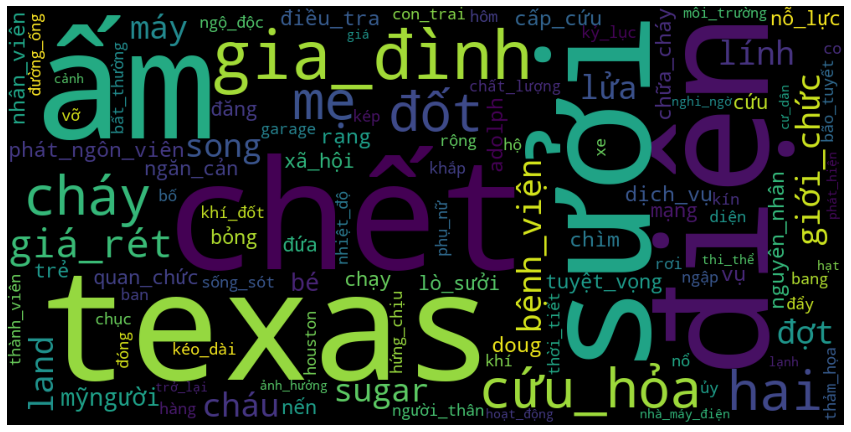

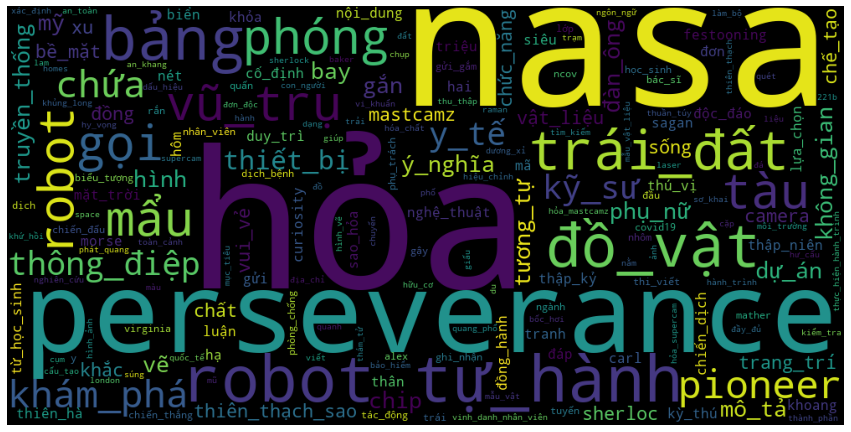

In [67]:


# Search all file in folder
for root, dirs, files in os.walk(urls.RAW_DATA_TEST_PATH):
    for file in files:
        ## Read all file in raw_data_test
        file_path = os.path.join(urls.RAW_DATA_TEST_PATH, file)
        print(file_path)
        exam_str = FileReader(file_path).read()
        

        nlp = NLP(text=exam_str)
        #Segment words
        tokens = nlp.preprocessText(exam_str)

        
        # Visualize words
        dv = DataVisualizer(tokens)
        # print(dv.count_tokens(tokens))
        dv.process()
        # dv.save_fig(file+".png")
        print(file)





In [ ]:
from gensim import corpora, matutils
import json
import _pickle as cPickle
class FileStore(object):
    def __init__(self, filePath, data = None):
        self.filePath = file_path
        self.data = data
    
    def store_dictionary(self, dict_words):
        dictionary = corpora.Dictionary(dict_words)
        dictionary.filter_extremes(no_below=20, no_above=0.3)
        dictionary.save_as_text(self.filePath)
    def store_json(self):
        with open(self.filePath, 'w') as outfile:
            json.dump(self.data, outfile)
    def save_pickle(self, obj):
        outfile = open(self.filePath, 'wb')
        _pickle.dump(outfile, obj)
        outfile.close()
        
